# The purpose of this code is visual Decision tree algorithms.

In [72]:
import os
import pandas as pd
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
import decimal


In [73]:
df = pd.read_csv("human-activity-recognition-with-smartphones.csv")

In [74]:
print(f"Dataframe shape : {df.shape}")

Dataframe shape : (7352, 563)


In [75]:
df.head(10)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
5,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,-0.844619,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126,1,STANDING
6,0.279454,-0.019641,-0.110022,-0.996921,-0.967186,-0.983118,-0.997003,-0.966097,-0.983116,-0.940987,...,-0.564430,-0.212754,-0.230622,0.014637,-0.189512,-0.852150,0.182170,-0.043010,1,STANDING
7,0.277432,-0.030488,-0.125360,-0.996559,-0.966728,-0.981585,-0.996485,-0.966313,-0.982982,-0.940987,...,-0.421715,-0.020888,0.593996,-0.561871,0.467383,-0.851017,0.183779,-0.041976,1,STANDING
8,0.277293,-0.021751,-0.120751,-0.997328,-0.961245,-0.983672,-0.997596,-0.957236,-0.984379,-0.940598,...,-0.572995,0.012954,0.080936,-0.234313,0.117797,-0.847971,0.188982,-0.037364,1,STANDING
9,0.280586,-0.009960,-0.106065,-0.994803,-0.972758,-0.986244,-0.995405,-0.973663,-0.985642,-0.940028,...,0.140452,-0.020590,-0.127730,-0.482871,-0.070670,-0.848294,0.190310,-0.034417,1,STANDING


In [76]:
list_of_activity = df["Activity"].unique().tolist() 
print(list_of_activity)

['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']


In [77]:
X = df.drop(columns = "Activity")
print(X.shape)

(7352, 562)


In [78]:
y = df["Activity"]
print(y.shape)

(7352,)


In [79]:
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True)

In [80]:
DT_classifer = tree.DecisionTreeClassifier()

In [81]:
fitted_DT = DT_classifer.fit(X_train, y_train)

In [82]:
y_predicted = fitted_DT.predict(X_test)

In [83]:
first_prediction = accuracy_score(y_test, y_predicted)
print(first_prediction)

0.9524133242692047


In [84]:
import graphviz
dot_data = tree.export_graphviz(DT_classifer, out_file=None)
# Draw graph
graph = graphviz.Source(dot_data) 
#graph

In [86]:
filename = graph.render(filename='graph')

In [46]:
DT_classifer_criterion_gini = tree.DecisionTreeClassifier(criterion='gini')
fitted_DT_criterion_gini = DT_classifer_criterion_gini.fit(X_train, y_train)
y_predicted_criterion_gini = fitted_DT_criterion_gini.predict(X_test)
prediction_criterion_gini = accuracy_score(y_test, y_predicted_criterion_gini)
print(prediction_criterion_gini)

0.9598912304554724


In [47]:
DT_classifer_criterion_entropy = tree.DecisionTreeClassifier(criterion='entropy')
fitted_DT_criterion_entropy = DT_classifer_criterion_entropy.fit(X_train, y_train)
y_predicted_criterion_entropy = fitted_DT_criterion_entropy.predict(X_test)
prediction_criterion_entropy = accuracy_score(y_test, y_predicted_criterion_entropy)
print(prediction_criterion_entropy)

0.9571719918422842


splitter{“best”, “random”}, default=”best”
The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

In [48]:
DT_classifer_splitter_best = tree.DecisionTreeClassifier(splitter = 'best')
fitted_DT_splitter_best = DT_classifer_splitter_best.fit(X_train, y_train)
y_predicted_splitter_best = fitted_DT_splitter_best.predict(X_test)
prediction_splitter_best = accuracy_score(y_test, y_predicted_splitter_best)
print(prediction_splitter_best)

0.9564921821889871


In [49]:
DT_classifer_splitter_random = tree.DecisionTreeClassifier(splitter = 'random')
fitted_DT_splitter_random = DT_classifer_splitter_random.fit(X_train, y_train)
y_predicted_splitter_random = fitted_DT_splitter_random.predict(X_test)
prediction_splitter_random = accuracy_score(y_test, y_predicted_splitter_random)
print(prediction_splitter_random)

0.938137321549966


In [50]:
DT_classifer_criterion_gini_splitter_best = tree.DecisionTreeClassifier(criterion='gini', splitter = 'best')
fitted_DT_criterion_gini_splitter_best = DT_classifer_criterion_gini_splitter_best.fit(X_train, y_train)
y_predicted_criterion_gini_splitter_best = fitted_DT_criterion_gini_splitter_best.predict(X_test)
prediction_criterion_gini_splitter_best = accuracy_score(y_test, y_predicted_criterion_gini_splitter_best)
print(prediction_criterion_gini_splitter_best)

0.9571719918422842


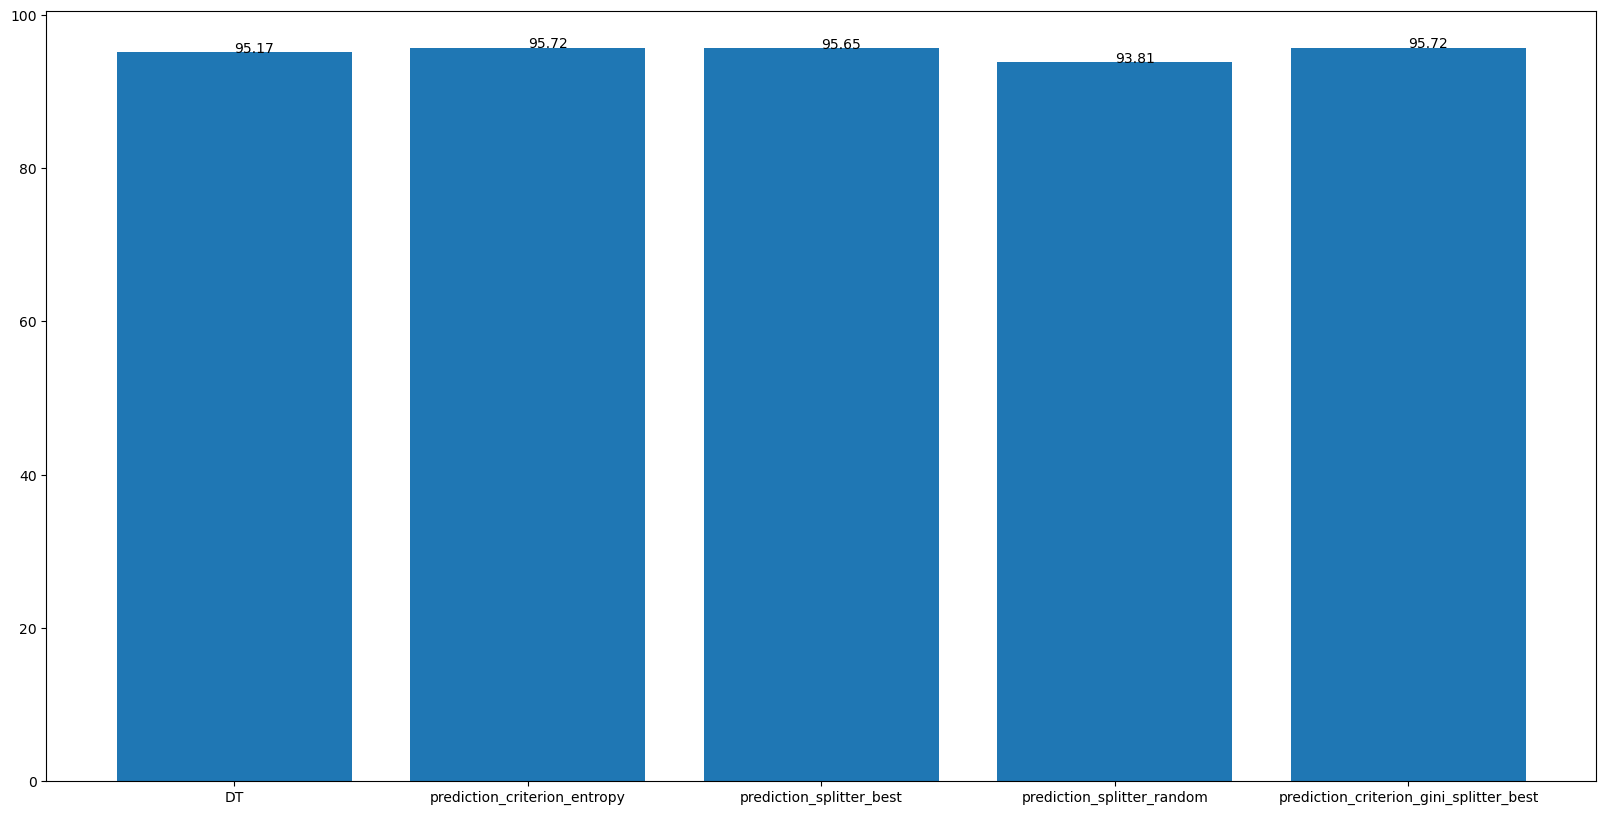

In [51]:
import matplotlib.pyplot as plt

execution = ("DT", 'prediction_criterion_entropy','prediction_splitter_best',
             'prediction_splitter_random','prediction_criterion_gini_splitter_best')
accuracy = [float(round(first_prediction*100,2)), float(round(prediction_criterion_entropy*100,2)), float(round(prediction_splitter_best*100,2)), 
            float(round(prediction_splitter_random*100,2)), float(round(prediction_criterion_gini_splitter_best*100,2))]
fig = plt.figure(figsize = (20, 10))
plt.bar(execution,accuracy)

for index, value in enumerate(accuracy):
    plt.text(index, value,str(value))
    
plt.show()